# 4.9 Intro to Data Visualization with Python Part - 2

## This script contains the following points:

### 1. Create a histogram of the "order_hour_of_day" column.

### 2. Create a bar chart from the "loyalty_flag" column.

### 3. Check if there is a difference in expenditures depending on the hour of the day.

### 4. Check if there is a connection between age and number dependants.

### 5. Create a scatterplot to see if there is a connection between age and income.

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

In [2]:
warnings.filterwarnings('ignore')

# 02. Importing data

In [3]:
path = r'C:\Users\Priya\27-02-2024 Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\Priya\\27-02-2024 Instacart Basket Analysis'

In [6]:
# Import ords_prods_all dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

<Axes: xlabel='orders_day_of_week'>

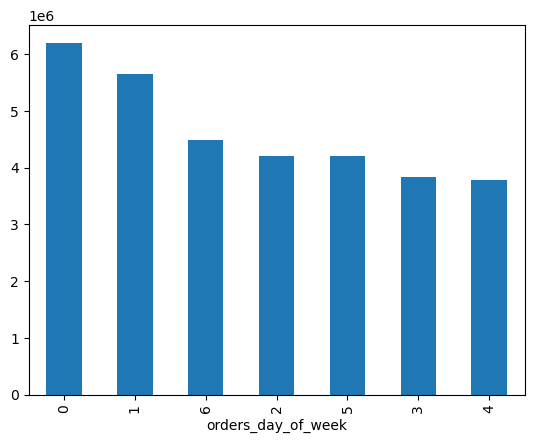

In [7]:
# Create a Bar Chart
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

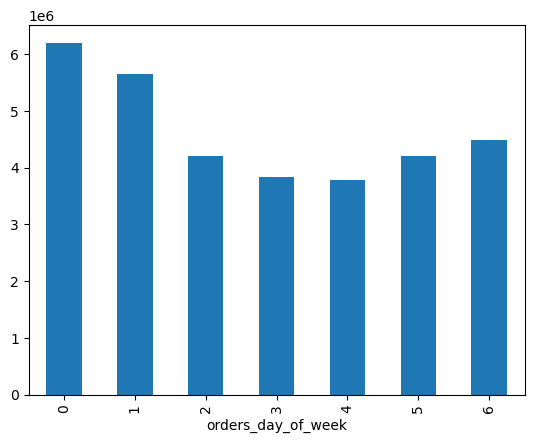

In [8]:
# Sort by index - days of the week in order
bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

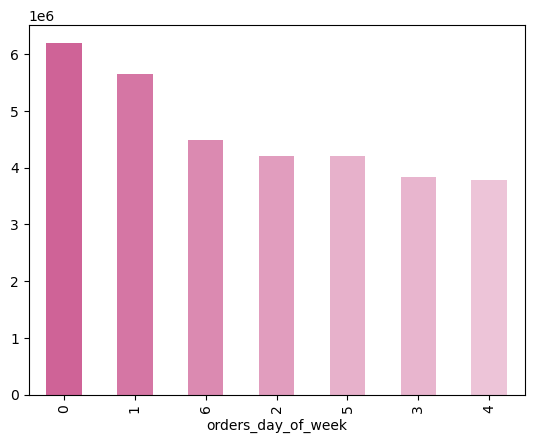

In [9]:
# Adding color to the bars
bar = df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar(color =['#cf6397','#d576a4','#db8ab1','#e19dbe','#e7b1cb','#e8b5ce','#edc4d8'])

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

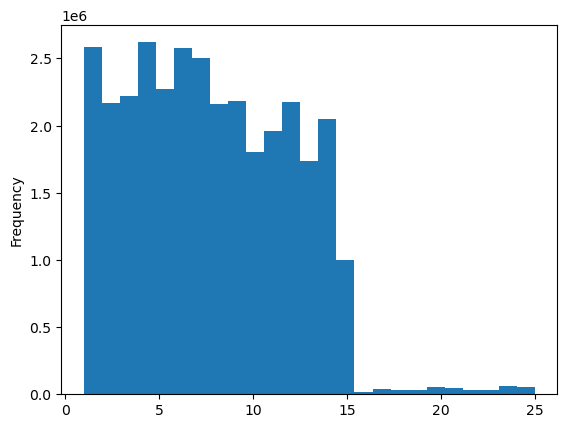

In [11]:
# Create a Histograms
df_ords_prods_all['prices'].plot.hist(bins = 25)

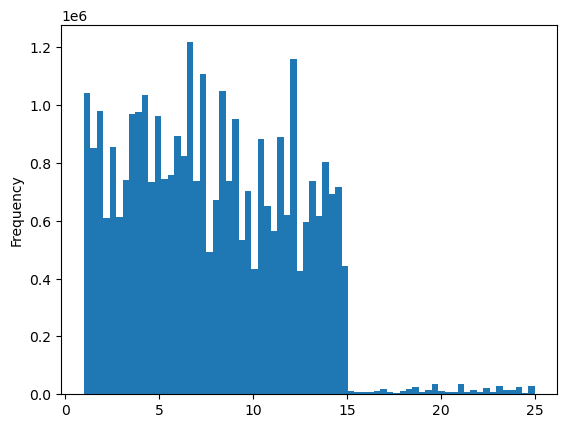

In [12]:
hist = df_ords_prods_all['prices'].plot.hist(bins = 70)

In [13]:
# Export the Histograms
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [14]:
# Create a subset of the dataframe
df = df_ords_prods_all[:2000000]

In [15]:
df

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order frequency flag,First Name,Last Name,Gender,State,Age,Number_of_Dependants,Familial_Status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,14467,Sweet Baguette,112,3,4.5,2674010,29046,43,0,12,...,Frequent customer,Pamela,Lara,Female,New York,39,3,married,72317,both
1999996,14467,Sweet Baguette,112,3,4.5,1409619,29046,51,0,12,...,Frequent customer,Pamela,Lara,Female,New York,39,3,married,72317,both
1999997,14467,Sweet Baguette,112,3,4.5,2189598,29046,52,2,11,...,Frequent customer,Pamela,Lara,Female,New York,39,3,married,72317,both
1999998,14467,Sweet Baguette,112,3,4.5,2741737,29046,61,2,9,...,Frequent customer,Pamela,Lara,Female,New York,39,3,married,72317,both


In [16]:
# Create the seed
np.random.seed(4)

In [17]:
# Create a list holding True/False values to test the np.random.rand() <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [20]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [21]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [22]:
len(df_ords_prods_all)

32404859

In [23]:
len(big) + len(small)

32404859

In [24]:
df_2 = small[['orders_day_of_week', 'prices']]

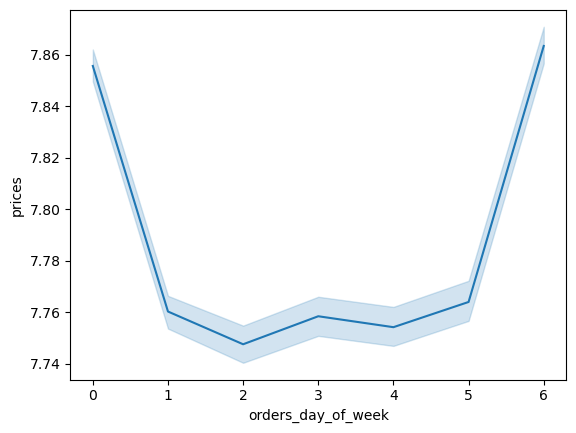

In [25]:
# Create Line Chart for the 30% sample
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
df_4 = df_ords_prods_all[['orders_day_of_week','prices']]

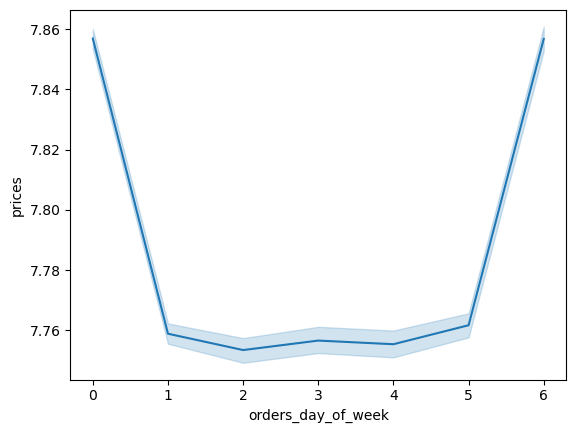

In [28]:
# Create Line Chart for the 70% sample
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')

In [29]:
# Exporting the Line Chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

## 1. Create a histogram of the "order_hour_of_day" column.

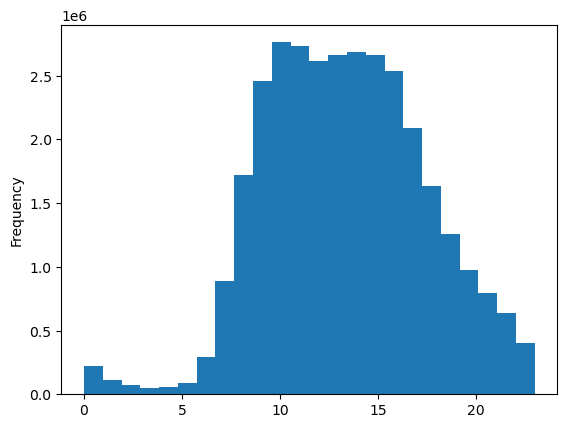

In [30]:
# Create a histogram of the 'order_hour_of_day' column
hist_order_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

In [31]:
# Export the Histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### The histogram demostrates that the least busy times are from 1am - 6am. The peak hours for orders are from approximately 9am - 6pm. After 5pm, orders start to decline and each subsequent hour after, continues to steadily decline.

## 2. Create a bar chart from the "loyalty_flag" column.

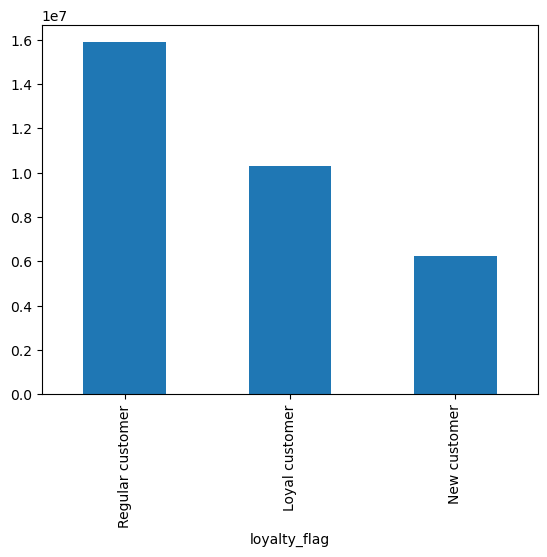

In [32]:
# Create a bar chart from the 'loyalty_flag' column
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [47]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## 3. Check if there is a difference in expenditures depending on the hour of the day.

In [33]:
# Create the seed
np.random.seed(4)

In [34]:
# Create a list holding True/False values to test the np.random.rand() <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [35]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [36]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [38]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [39]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [40]:
len(df_ords_prods_all)

32404859

In [41]:
len(big) + len(small)

32404859

In [42]:
df_3 = small[['order_hour_of_day','prices']]

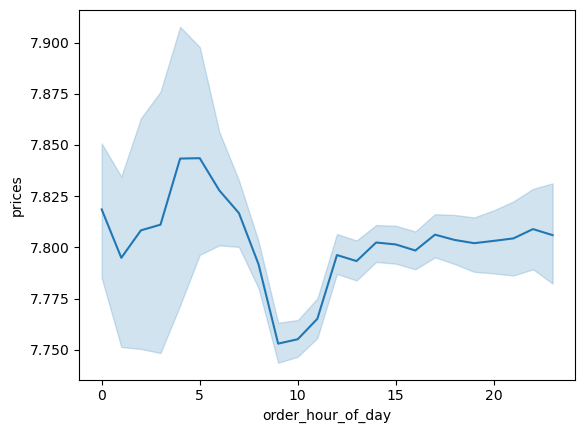

In [43]:
# Create Line Chart for the 30% sample
line_order_hour_of_day = sns.lineplot(data = df_3, x='order_hour_of_day', y='prices')

In [44]:
df_5 = df_ords_prods_all[['order_hour_of_day','prices']]

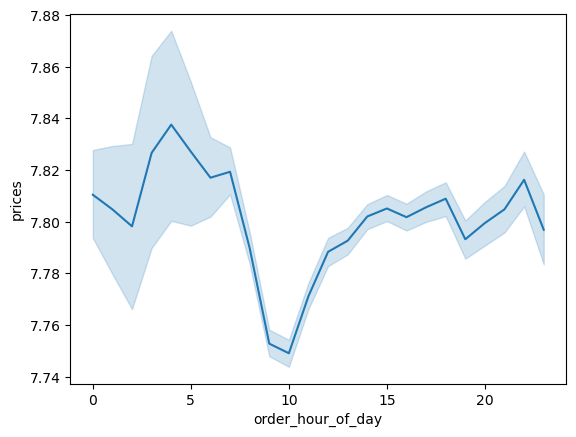

In [45]:
line_2_order_hour_of_day = sns.lineplot(data = df_5, x='order_hour_of_day', y='prices')

In [46]:
# Exporting the line chart
line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day.png'))

## 4. Check if there is a connection between age and number dependants.

In [48]:
# Create the seed
np.random.seed(4)

In [49]:
# Create a list holding True/False values to test the np.random.rand() <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [50]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [51]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [52]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [53]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [54]:
len(df_ords_prods_all)

32404859

In [55]:
len(big) + len(small)

32404859

In [56]:
df_4 = small[['Number_of_Dependants','Age']]

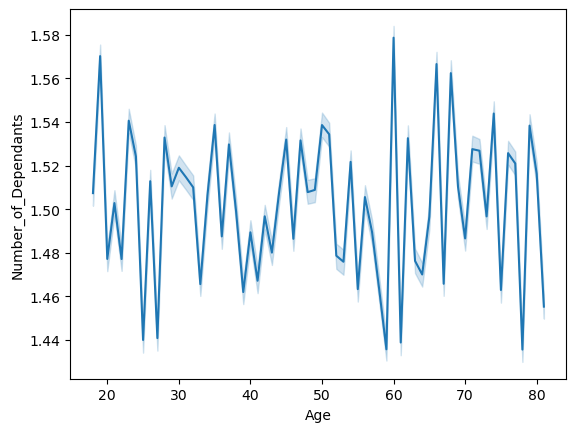

In [57]:
# Create Line Chart for the 30% sample
line_number_of_dependants = sns.lineplot(data = df_4, x='Age', y='Number_of_Dependants')

In [58]:
df_6 = df_ords_prods_all[['Number_of_Dependants','Age']]

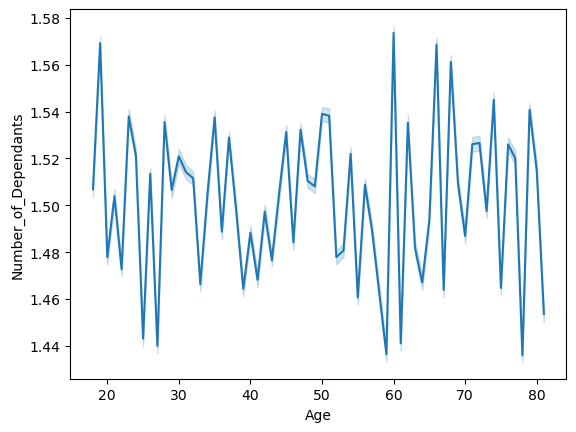

In [59]:
line_2_number_of_dependants = sns.lineplot(data = df_6, x='Age', y='Number_of_Dependants')

In [60]:
# Exporting the line chart
line_number_of_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_number_of_dependants.png'))

### The line chart does not show a correlation between age and number of dependants.

## 5. Create a scatterplot to see if there is a connection between age and income.

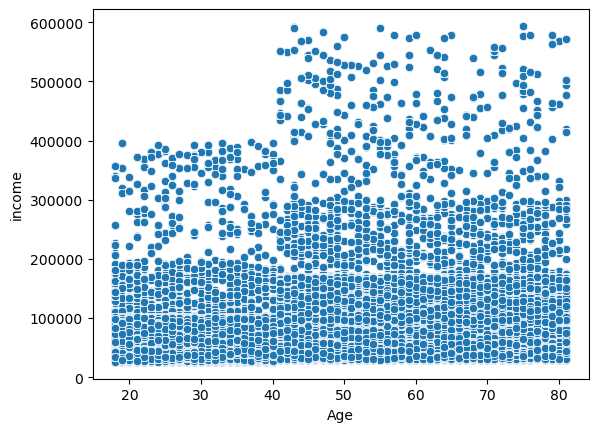

In [61]:
scatterplot_age_income = sns.scatterplot(x='Age', y='income', data = df_ords_prods_all)

In [62]:
# Exporting the scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

### The scatterplot shows that the highest density of income across all ages is between $0.00 - $200,000. Then the next highest income bracket is from $200,000 - $300,000 for the 40+ age group. There are income values from $200,000 - $400,000 across all age ranges. Finally, there are income values of $300,000 - $600,000 scattered across the 40+ age ranges as well.